In [1]:
import json
import csv
#with open('/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/final_analysis.json') as json_file:
    #data = json.load(json_file)


In [2]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

from TestRecommender import fixed_treatments, final_full_analysis, test_exploration

In [4]:
"""
new_dict_sum = {}
new_dict_mean = {}
for key, value in data.items():
    new_dict_sum[key] = sum(value)
    new_dict_mean[key] = sum(value)/len(value)

sorted_sum = {k: v for k, v in sorted(new_dict_sum.items(), key=lambda item: item[1])}
sorted_mean= {k: v for k, v in sorted(new_dict_mean.items(), key=lambda item: item[1])}

print(sorted_sum)




"""

  0%|          | 0/129 [00:00<?, ?it/s]{'fixed_policy_101': -99.9999999999986, 'fixed_policy_121': -97.99999999999874, 'fixed_policy_102': -97.9999999999987, 'fixed_policy_105': -95.99999999999878, 'fixed_policy_23': -94.9999999999989, 'fixed_policy_48': -94.99999999999878, 'fixed_policy_93': -94.99999999999875, 'fixed_policy_50': -92.99999999999885, 'fixed_policy_19': -92.9999999999988, 'fixed_policy_44': -92.99999999999876, 'fixed_policy_60': -90.99999999999913, 'fixed_policy_69': -90.99999999999905, 'fixed_policy_70': -90.99999999999902, 'fixed_policy_43': -90.99999999999898, 'fixed_policy_7': -90.99999999999892, 'fixed_policy_98': -90.99999999999892, 'fixed_policy_56': -89.99999999999922, 'fixed_policy_40': -89.99999999999918, 'fixed_policy_82': -89.99999999999905, 'fixed_policy_5': -89.99999999999902, 'fixed_policy_35': -89.99999999999892, 'fixed_policy_67': -88.9999999999993, 'fixed_policy_113': -88.99999999999925, 'fixed_policy_26': -88.99999999999923, 'fixed_policy_71': -88.999

In [47]:
return_dict = fixed_treatments(n_tests=10000)
counter = 1
for key, value in return_dict.items():
    print(counter)
    sum_val = sum(value[0])
    mean_val  = sum(value[0])/len(value[0])
    covars = value[1]
    covars = covars.loc[covars["y"]==1.0]
    s = covars.sum()
    covars = covars[s.sort_values(ascending=False).index]
    covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
    covars.head()
    top5 = covars.iloc[:,:5]
    bot5 = covars.iloc[:,-5:]
    top5.head()
    print("Action: ", key)
    #print("Sum of utilities: ", sum_val )
    if sum_val>500:
        print("large utility: ", sum_val, key)
    #print("Mean of utilities: ", mean_val )
    #print(list(top5.index)+list(bot5.index))
    fig = plt.gcf()
    fig.set_size_inches(11,8)
    plt.bar(list(top5.columns)+list(bot5.columns), list(top5.sum())+list(bot5.sum()))
    plt.title(key)
    plt.show()
    counter +=1



  0%|          | 0/129 [00:00<?, ?it/s]a_t = 0


  1%|          | 1/129 [00:01<03:21,  1.58s/it]a_t = 1


  2%|▏         | 2/129 [00:02<03:13,  1.53s/it]a_t = 2


  2%|▏         | 3/129 [00:04<03:08,  1.49s/it]a_t = 3


  3%|▎         | 4/129 [00:05<03:00,  1.44s/it]a_t = 4


  4%|▍         | 5/129 [00:08<03:36,  1.75s/it]


KeyboardInterrupt: 

In [ ]:
sorted_sum = {k: sum(v[0]) for k, v in sorted(return_dict.items(), key=lambda item: item[1])}
sorted_sum = {k: v for k, v in sorted(sorted_sum.items(), key=lambda item: item[1])}

In [ ]:
models = []
names = []
for ind, (k,v) in enumerate(sorted_sum.items()):
    if ind >=10:
        break
    else:
        models.append(v)
        names.append(k)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.bar(names, models)
plt.title("Utility of various models with 2 actions and 5000 online iterations")
plt.xlabel("Model")
plt.ylabel("Utility")
plt.show()
fig.savefig("./fixed_plot.png")

In [ ]:
from sklearn.utils import resample
for key, value in return_dict.items():
    plt.hist([sum(resample(value[0])) for _ in range(500)], bins=15)
    plt.xlabel("Utility")
    plt.ylabel("Count")
    plt.title("Histogram of utilities for " + key)
    plt.show()

In [ ]:
#Checking intersections of best three policies
best_three = [return_dict["fixed_policy_1"],
return_dict["fixed_policy_2"],
return_dict["fixed_policy_11"]]
for name, item in zip(["fixed_policy_1", "fixed_policy_2", "fixed_policy_11"], best_three):
    for name2, item2 in zip(["fixed_policy_1", "fixed_policy_2", "fixed_policy_11"], best_three):
        if name==name2:
            continue
        else:
            covars = item[1]
            covars = covars.loc[covars["y"]==1.0]
            s = covars.sum()
            covars = covars[s.sort_values(ascending=False).index]
            covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
            covars.head()
            top5 = covars.iloc[:,:10]
            bot5 = covars.iloc[:,-10:]

            covars = item2[1]
            covars = covars.loc[covars["y"]==1.0]
            s = covars.sum()
            covars = covars[s.sort_values(ascending=False).index]
            covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
            covars.head()
            top5_2 = covars.iloc[:,:10]
            bot5_2 = covars.iloc[:,-10:]

            print("Intersection of " +name+ " and "+ name2)
            print("Top 10 genes", set(top5).intersection(top5_2))
            print("Bottom 10 genes", set(bot5).intersection(bot5_2))

In [ ]:
#Checking the intersections of the worst three policies
worst_three = [return_dict["fixed_policy_101"],
return_dict["fixed_policy_102"],
return_dict["fixed_policy_48"]]
for name, item in zip(["fixed_policy_101", "fixed_policy_102", "fixed_policy_48"], worst_three):
    for name2, item2 in zip(["fixed_policy_101", "fixed_policy_102", "fixed_policy_48"], worst_three):
        if name==name2:
            continue
        else:
            covars = item[1]
            covars = covars.loc[covars["y"]==1.0]
            s = covars.sum()
            covars = covars[s.sort_values(ascending=False).index]
            covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
            covars.head()
            top5 = covars.iloc[:,:10]
            bot5 = covars.iloc[:,-10:]

            covars = item2[1]
            covars = covars.loc[covars["y"]==1.0]
            s = covars.sum()
            covars = covars[s.sort_values(ascending=False).index]
            covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
            covars.head()
            top5_2 = covars.iloc[:,:10]
            bot5_2 = covars.iloc[:,-10:]

            print("Intersection of " +name+ " and "+ name2)
            print("Top 10 genes", set(top5).intersection(top5_2))
            print("Bottom 10 genes", set(bot5).intersection(bot5_2))

In [46]:
#Test exploration
np.random.seed(1)
results = test_exploration(5000, epsilons = 25)

A

 10%|█         | 511/5000 [00:15<02:07, 35.10it/s]

 10%|█         | 515/5000 [00:15<02:06, 35.46it/s]

 10%|█         | 519/5000 [00:15<02:05, 35.84it/s]

 10%|█         | 523/5000 [00:15<02:05, 35.68it/s]

 11%|█         | 527/5000 [00:15<02:10, 34.18it/s]

 11%|█         | 531/5000 [00:15<02:19, 31.95it/s]

 11%|█         | 535/5000 [00:15<02:17, 32.46it/s]

 11%|█         | 539/5000 [00:15<02:12, 33.56it/s]

 11%|█         | 543/5000 [00:16<02:09, 34.48it/s]

 11%|█         | 547/5000 [00:16<02:08, 34.68it/s]

 11%|█         | 551/5000 [00:16<02:15, 32.73it/s]

 11%|█         | 555/5000 [00:16<02:10, 34.16it/s]

 11%|█         | 559/5000 [00:16<02:06, 35.15it/s]

 11%|█▏        | 563/5000 [00:16<02:13, 33.35it/s]

 11%|█▏        | 567/5000 [00:16<02:19, 31.84it/s]

 11%|█▏        | 571/5000 [00:16<02:17, 32.21it/s]

 12%|█▏        | 575/5000 [00:17<02:24, 30.64it/s]

 12%|█▏        | 579/5000 [00:17<02:26, 30.08it/s]

 12%|█▏        | 583/5000 [00:17<02:19, 31.56it/s]

 12%|█▏  

KeyboardInterrupt: 

In [ ]:
epsilons = []
values = []
for key, value in results.items():
    epsilons.append(key)
    values.append(sum(value))
    print("Epsilon: ",key, "Utility: ", sum(value))

In [ ]:
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.plot(epsilons, values)
plt.title("Utility of 2500 tests at various levels of exploration")
plt.xlabel("Exploration factor")
plt.ylabel("Utility")
plt.show()
fig.savefig("./img/exploration_plot.png")

In [3]:
final_anal_dict = final_full_analysis(n_tests=1000)
#print("FINAL UTILITIES", final_anal_dict)
print("DONE WITH TEST")
#with open('/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/final_analysis.json', 'w') as fp:
    #json.dump(final_anal_dict, fp)

START
N_ACTIONS  129
On model  adaptive_m_bl
- Start fitting treatment outcomes
  0%|          | 3/1000 [00:00<00:40, 24.85it/s]- Stop fitting treatment outcomes
Testing for  1000 steps
100%|██████████| 1000/1000 [00:32<00:00, 30.79it/s]
On model  adaptive_m_thomp
- Start fitting treatment outcomes
  1%|          | 7/1000 [00:00<00:14, 67.71it/s]- Stop fitting treatment outcomes
Testing for  1000 steps
100%|██████████| 1000/1000 [00:17<00:00, 56.71it/s]
On model  adaptive_c
100%|██████████| 1000/1000 [05:31<00:00,  3.02it/s]On model  improved_m_bl
Fitting treatment outcomes

100%|██████████| 1000/1000 [00:32<00:00, 31.06it/s]
On model  improved_m_impr_varsel
Fitting treatment outcomes
100%|██████████| 1000/1000 [00:29<00:00, 33.77it/s]
On model  improved_c
100%|██████████| 1000/1000 [00:08<00:00, 112.43it/s]
On model  historical
Fitting treatment outcomes
100%|██████████| 1000/1000 [00:29<00:00, 33.88it/s]
a_t = 0
a_t = 1
a_t = 2
a_t = 3
a_t = 4
a_t = 5
a_t = 6
a_t = 7
a_t = 8
a_t = 9


In [6]:
import data_generation

In [7]:
two_action_generator = data_generation.DataGenerator(
    matrices="./generating_matrices.mat")

In [8]:
two_action_anal = final_full_analysis(n_tests = 5000, generator=two_action_generator)

START
N_ACTIONS  2
On model  adaptive_m_bl
- Start fitting treatment outcomes
  1%|          | 29/5000 [00:00<00:17, 277.19it/s]- Stop fitting treatment outcomes
Testing for  5000 steps
100%|██████████| 5000/5000 [00:53<00:00, 93.00it/s] 
On model  adaptive_m_thomp
- Start fitting treatment outcomes
  1%|          | 49/5000 [00:00<00:20, 242.10it/s]- Stop fitting treatment outcomes
Testing for  5000 steps
100%|██████████| 5000/5000 [00:15<00:00, 321.71it/s]
On model  adaptive_c
100%|██████████| 5000/5000 [43:10<00:00,  1.93it/s]On model  improved_m_bl
Fitting treatment outcomes

100%|██████████| 5000/5000 [00:50<00:00, 99.28it/s]
On model  improved_m_impr_varsel
Fitting treatment outcomes
100%|██████████| 5000/5000 [00:40<00:00, 124.57it/s]
On model  improved_c
100%|██████████| 5000/5000 [00:01<00:00, 2752.52it/s]
On model  historical
Fitting treatment outcomes
100%|██████████| 5000/5000 [00:49<00:00, 101.04it/s]
a_t = 0
a_t = 1


In [42]:
scores = []
models = ["AdapBL app1", "AdapThomp", "AdapBL app2","ImpBL app1", "ImpBL varsel", "ImpBL app2", "Historical",
"Fixed 0", "Fixed 1"]
model_names = ["adaptive_m_bl", 
    "adaptive_m_thomp",
    "adaptive_c", 
    "improved_m_bl",
    "improved_m_impr_varsel", 
    "improved_c",
     "historical",
     "fixed_policy_0",
     "fixed_policy_1"]
for model, score in two_action_anal.items():
    if model in model_names:
        print(model, sum(score)/len(score))
        scores.append(sum(score)/len(score))

adaptive_m_bl 0.44280000000004166
adaptive_m_thomp 0.049760000000000394
adaptive_c 0.42968000000004103
improved_m_bl 0.43040000000003903
improved_m_impr_varsel 0.4388000000000404
improved_c 0.43464000000004027
historical 0.43920000000004067
fixed_policy_0 0.0112
fixed_policy_1 0.45040000000004377


6

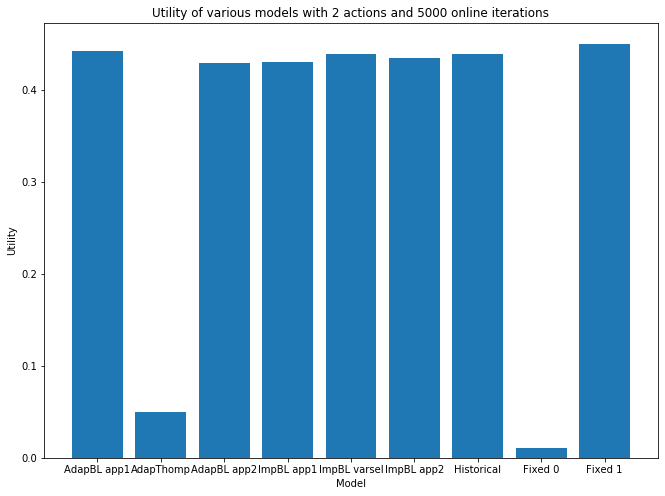

In [43]:
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.bar(models, scores)
plt.title("Utility of various models with 2 actions and 5000 online iterations")
plt.xlabel("Model")
plt.ylabel("Utility")
plt.show()
fig.savefig("./final_2_plot.png")

In [23]:
scores = []
models = ["AdapBL app1", "AdapThomp", "AdapBL app2", "ImprBL app1", "ImprBL varsel", "ImpBL app2", "Historical",
"Fixed 0", "Fixed 1", "Fixed 2"]
model_names = ["adaptive_m_bl", 
    "adaptive_m_thomp",
    "adaptive_c", 
    "improved_m_bl",
    "improved_m_impr_varsel", 
    "improved_c",
     "historical",
     "fixed_policy_0",
     "fixed_policy_1",
     "fixed_policy_2"]
for model, score in final_anal_dict.items():
    if model in model_names:
        print(model, sum(score)/len(score))
        scores += [sum(score)/len(score)]

adaptive_m_bl 0.44899999999999324
adaptive_m_thomp 0.017499999999999214
adaptive_c 0.5961999999999893
improved_m_bl 0.4299999999999934
improved_m_impr_varsel 0.4289999999999934
improved_c 0.627099999999988
historical 0.43899999999999334
fixed_policy_0 0.009
fixed_policy_1 0.44199999999999345
fixed_policy_2 0.45199999999999235


In [24]:
len(scores)

10

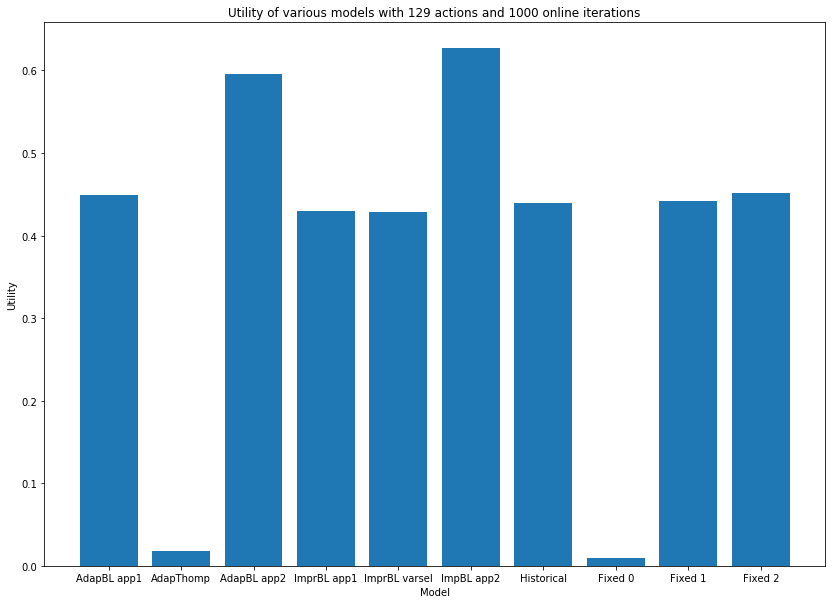

In [27]:
fig = plt.gcf()
fig.set_size_inches(14,10)
plt.bar(models, scores)
plt.title("Utility of various models with 129 actions and 1000 online iterations")
plt.xlabel("Model")
plt.ylabel("Utility")
plt.show()
fig.savefig("./img/final_129_plot.png")